In [1]:
%pip install tidy3d

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 785.5/785.5 kB 9.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.5/132.5 kB 17.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 97.5/97.5 kB 14.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.2/55.2 kB 6.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.6/235.6 kB 24.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.8/8.8 MB 77.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.5/79.5 kB 12.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.1/51.1 kB 8.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.8/143.8 kB 21.6 MB/s eta 0:00:00
  Attempting uninstall: urllib3
    Found existing installation: urllib3 2.0.7
    Uninstalling urllib3-2.0.7:
      Successfully uninstalled urllib3-2.0.7
  Attempting uninstall: rich
    Found existing installation: rich 13.7.1
    Uninstalling rich-13.7.1:
      Su

In [2]:
import tidy3d as td
from tidy3d.plugins import waveguide

import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Materiais utilizados
si = td.material_library["cSi"]["Li1993_293K"]
sio2 = td.material_library["SiO2"]["Horiba"]
# Dimensões do guia de onda
core_w = 0.45
core_h = 0.22
# Comprimento de onda
wvl = 1.55

In [4]:
# Objeto com os parâmetros do guia, material e comprimento de onda.
strip = waveguide.RectangularDielectric(
    wavelength=wvl,
    core_width=core_w,
    core_thickness=core_h,
    core_medium=si,
    clad_medium=sio2,
    mode_spec=td.ModeSpec(num_modes=2, group_index_step=True),
)

(-0.7, 0.7)

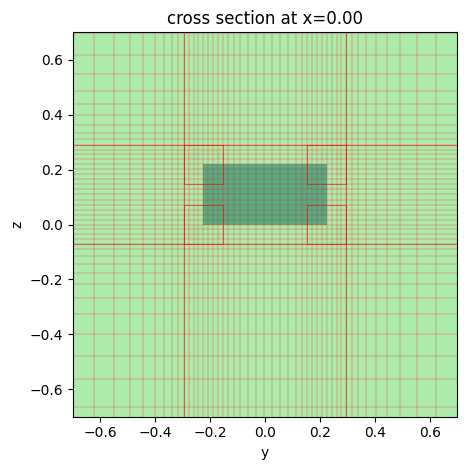

In [5]:
# Visuliza a seção cruzada em x = 0
ax = strip.plot(x=0)
strip.plot_grid(x=0, ax=ax, lw=0.4, colors="r")
ax.set_xlim(-0.7, 0.7)
ax.set_ylim(-0.7, 0.7)
# Para maiores informações sobre grade não uniforme, verificar https://www.flexcompute.com/tidy3d/examples/notebooks/AutoGrid/

In [6]:
# Visualiza os resultados, considerando dois modos e uma frequência de análise
strip.mode_solver.data.to_dataframe()

wavelength     n eff     k eff  loss (dB/cm)  \
f            mode_index                                                 
1.934145e+14 0                 1.55  2.422314  0.000058     20.323461   
             1                 1.55  1.838560  0.000210     73.943299   

                         TE (Ey) fraction  wg TE fraction  wg TM fraction  \
f            mode_index                                                     
1.934145e+14 0                   0.979024        0.732153        0.829746   
             1                   0.042040        0.673324        0.883340   

                         mode area  group index  dispersion (ps/(nm km))  
f            mode_index                                                   
1.934145e+14 0            0.195683     4.293256              1392.302250  
             1            0.318924     4.063506            -16760.166704

In [7]:
# Visualiza os resultados, considerando três modos e uma frequência de análise
num_modes = 3
strip = strip.copy(update={"mode_spec":td.ModeSpec(num_modes=num_modes, group_index_step=True)})
strip.mode_solver.data.to_dataframe()

wavelength     n eff     k eff  loss (dB/cm)  \
f            mode_index                                                 
1.934145e+14 0                 1.55  2.422314  0.000058     20.323474   
             1                 1.55  1.838558  0.000210     73.964275   
             2                 1.55  1.473115  0.000204     71.776875   

                         TE (Ey) fraction  wg TE fraction  wg TM fraction  \
f            mode_index                                                     
1.934145e+14 0                   0.979024        0.732153        0.829746   
             1                   0.042040        0.673322        0.883340   
             2                   0.649678        0.926155        0.981088   

                         mode area  group index  dispersion (ps/(nm km))  
f            mode_index                                                   
1.934145e+14 0            0.195683     4.293280              1444.841957  
             1            0.318922     4.063301            -16838.976265  
             2            1.394534     2.003167            -12294.291563

In [8]:
# Eleva a resolução da simulação.
strip = strip.copy(update={"grid_resolution":20})
strip.mode_solver.data.to_dataframe()

wavelength     n eff     k eff  loss (dB/cm)  \
f            mode_index                                                 
1.934145e+14 0                 1.55  2.382770  0.000065     22.902666   
             1                 1.55  1.805044  0.000220     77.359306   
             2                 1.55  1.468675  0.000205     72.125484   

                         TE (Ey) fraction  wg TE fraction  wg TM fraction  \
f            mode_index                                                     
1.934145e+14 0                   0.974106        0.720300        0.826342   
             1                   0.043624        0.684590        0.879600   
             2                   0.640438        0.935883        0.983500   

                         mode area  group index  dispersion (ps/(nm km))  
f            mode_index                                                   
1.934145e+14 0            0.201310     4.303875               288.968391  
             1            0.324088     3.918279            -18835.485151  
             2            1.561468     1.931469            -12872.228346

In [9]:
# Visualiza os resultados, considerando três modos e três frequências de análise
wvl_vec = np.linspace(1.530,1.570,3)
strip = strip.copy(update={"wavelength":wvl_vec})
strip.mode_solver.data.to_dataframe()

wavelength     n eff     k eff  loss (dB/cm)  \
f            mode_index                                                 
1.959428e+14 0                 1.53  2.383513  0.000062     22.244789   
             1                 1.53  1.776417  0.000238     84.723547   
             2                 1.53  1.470326  0.000207     73.718771   
1.934145e+14 0                 1.55  2.358841  0.000065     22.790564   
             1                 1.55  1.751686  0.000239     84.074316   
             2                 1.55  1.464268  0.000205     72.200007   
1.909506e+14 0                 1.57  2.334144  0.000067     23.346787   
             1                 1.57  1.728477  0.000239     83.205990   
             2                 1.57  1.459146  0.000203     70.655398   

                         TE (Ey) fraction  wg TE fraction  wg TM fraction  \
f            mode_index                                                     
1.959428e+14 0                   0.978398        0.734923        0.821548   
             1                   0.046665        0.692573        0.882161   
             2                   0.644061        0.930482        0.981380   
1.934145e+14 0                   0.977054        0.730309        0.820352   
             1                   0.046099        0.703073        0.881681   
             2                   0.636890        0.940838        0.984198   
1.909506e+14 0                   0.975664        0.725904        0.819212   
             1                   0.045385        0.713802        0.881490   
             2                   0.630151        0.949348        0.986676   

                         mode area  group index  dispersion (ps/(nm km))  
f            mode_index                                                   
1.959428e+14 0            0.190887     4.270214              -133.066253  
             1            0.333824     3.726895            -19560.739153  
             2            1.462834     1.974152            -12747.747013  
1.934145e+14 0            0.197552     4.272150               367.777953  
             1            0.350979     3.609765            -19702.390326  
             2            1.790400     1.895448            -12189.212148  
1.909506e+14 0            0.204495     4.272845              -855.861796  
             1            0.369728     3.490724            -20462.877494  
             2            2.205866     1.828147            -10425.952791

/usr/local/lib/python3.10/dist-packages/matplotlib/cbook/__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


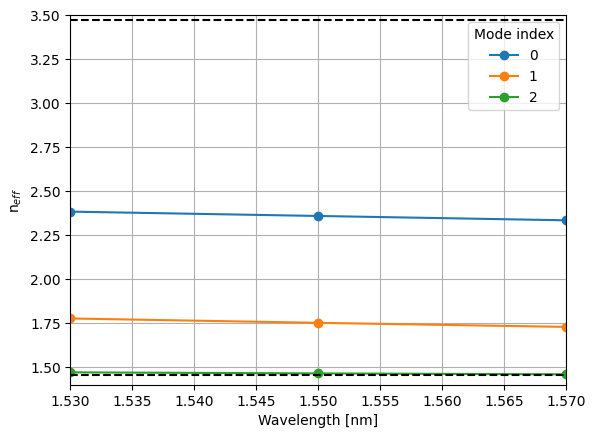

In [10]:
# Apresenta os resultados: neff x comprimento de onda
plt.plot(wvl_vec, strip.n_eff.values, 'o-')
plt.plot([wvl_vec.min(),wvl_vec.max()], [np.sqrt(si.eps_model(td.C_0/1.55)),np.sqrt(si.eps_model(td.C_0/1.55))], 'k--')
plt.plot([wvl_vec.min(),wvl_vec.max()], [np.sqrt(sio2.eps_model(td.C_0/1.55)),np.sqrt(sio2.eps_model(td.C_0/1.55))], 'k--')
plt.xlabel('Wavelength [nm]')
plt.ylabel(r'n$_{eff}$')
plt.xlim([wvl_vec.min(),wvl_vec.max()])
plt.ylim([1.4,3.5])
plt.legend(np.arange(num_modes),title="Mode index")
plt.grid()

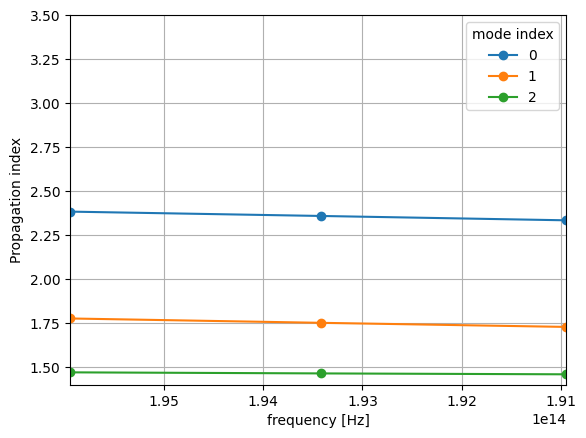

In [11]:
# Apresenta os resultados: neff x frequência, utilizando o método do objeto
fig, ax = plt.subplots(1)
n_eff = strip.n_eff  # real part of the effective mode index
n_eff.plot.line(x="f",marker='o')
plt.xlim([td.C_0/wvl_vec.min(),td.C_0/wvl_vec.max()])
plt.ylim([1.4,3.5])
plt.grid()
plt.show()

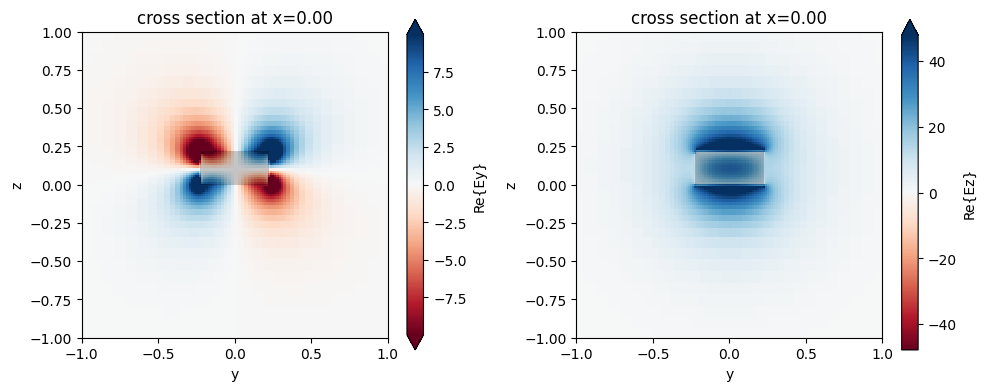

In [13]:
# Apresenta o perfil de campo do modo 0.
mode_index = 1
freq0 = td.C_0/wvl_vec[1]
fig, ax = plt.subplots(1, 2, figsize=(10, 4), tight_layout=True)
# quasi-TE mode
strip.plot_field("Ey", mode_index=mode_index, f=freq0, ax=ax[0])
# quasi-TM mode
strip.plot_field("Ez", mode_index=mode_index, f=freq0, ax=ax[1])
ax[0].set_xlim([-1,1])
ax[0].set_ylim([-1,1])
ax[1].set_xlim([-1,1])
ax[1].set_ylim([-1,1])
plt.tight_layout()

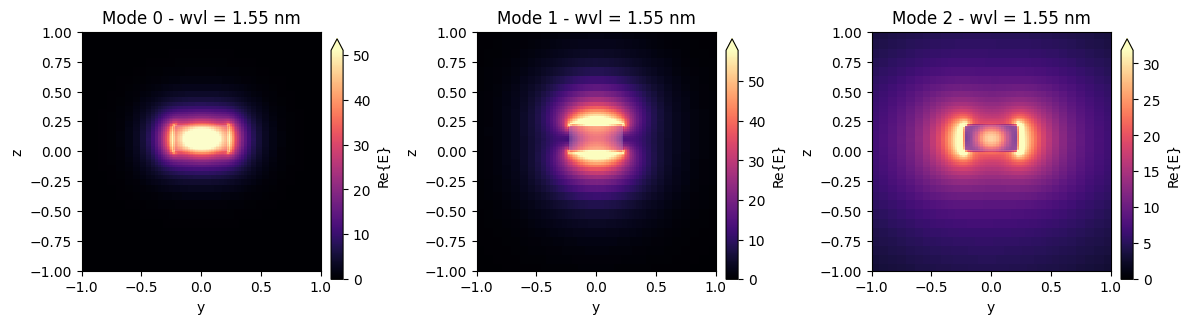

In [16]:
# Apresenta o perfil de campo E para todos os modos analizados.
fig, ax = plt.subplots(1, num_modes, figsize=(12, 6), tight_layout=True)
for i in range(num_modes):
  strip.plot_field("E", val='abs', mode_index=i, f=freq0, ax=ax[i], vmin = 0)
  ax[i].set_title('Mode %d - wvl = %.2f nm'%(i,td.C_0/freq0))
  ax[i].collections[-1].colorbar.remove()
  plt.colorbar(ax[i].collections[-1], label = 'Re{E}', extend = 'max', fraction=0.046, pad=0.04)
  ax[i].set_xlim([-1,1])
  ax[i].set_ylim([-1,1])

In [17]:
# Analise o índice efetivo dos modos para diferentes larguras do guia óptico
core_w_v = np.linspace(0.25,0.65,9)
strip = strip.copy(update={"wavelength":wvl})
neff = np.zeros([len(core_w_v),num_modes])
for i in range(len(core_w_v)):
  strip = strip.copy(update={"core_width":core_w_v[i]})
  neff[i,:] = strip.n_eff.values[0,:]

13:29:37 UTC WARNING: Mode field at frequency index 0, mode index 2 does not    
             decay at the plane boundaries.                                     

             WARNING: Mode field at frequency index 1, mode index 2 does not    
             decay at the plane boundaries.                                     

             WARNING: Mode field at frequency index 2, mode index 2 does not    
             decay at the plane boundaries.                                     

13:29:42 UTC WARNING: Mode field at frequency index 0, mode index 2 does not    
             decay at the plane boundaries.                                     

             WARNING: Mode field at frequency index 1, mode index 2 does not    
             decay at the plane boundaries.                                     

             WARNING: Mode field at frequency index 2, mode index 2 does not    
             decay at the plane boundaries.                                     

13:29:48 UTC WARNING: Mode field at frequency index 0, mode index 2 does not    
             decay at the plane boundaries.                                     

             WARNING: Mode field at frequency index 1, mode index 2 does not    
             decay at the plane boundaries.                                     

             WARNING: Mode field at frequency index 2, mode index 2 does not    
             decay at the plane boundaries.                                     

13:29:52 UTC WARNING: Mode field at frequency index 0, mode index 2 does not    
             decay at the plane boundaries.                                     

/usr/local/lib/python3.10/dist-packages/matplotlib/cbook/__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


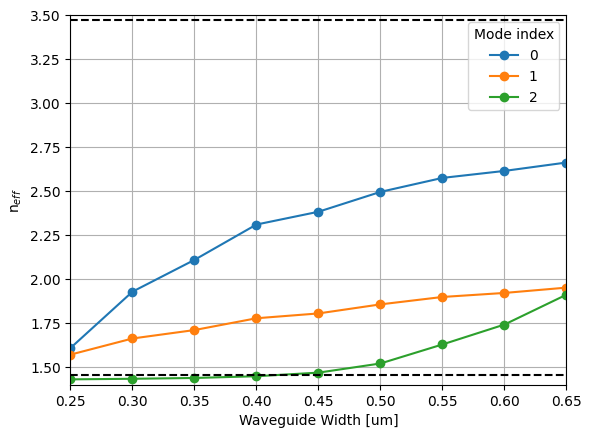

In [18]:
# Apresenta os resultados do índice efetivo dos modos em função da largura do guia.
plt.plot(core_w_v,neff, '-o')
plt.plot([core_w_v.min(),core_w_v.max()], [np.sqrt(si.eps_model(td.C_0/1.55)),np.sqrt(si.eps_model(td.C_0/1.55))], 'k--')
plt.plot([core_w_v.min(),core_w_v.max()], [np.sqrt(sio2.eps_model(td.C_0/1.55)),np.sqrt(sio2.eps_model(td.C_0/1.55))], 'k--')
plt.xlabel('Waveguide Width [um]')
plt.ylabel(r'n$_{eff}$')
plt.xlim([core_w_v.min(),core_w_v.max()])
plt.ylim([1.4,3.5])
plt.legend(np.arange(num_modes),title="Mode index")
plt.grid()